In [ ]:
! gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output 101_ObjectCategories.tar.gz
! tar -xvf 101_ObjectCategories.tar.gz
! mv 101_ObjectCategories caltech101
! rm -rf caltech101/BACKGROUND_Google

Streaming output truncated to the last 5000 lines.
101_ObjectCategories/chair/image_0005.jpg
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jpg
101_ObjectCategories/chai

In [ ]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3),pooling='max')
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
features = extract_features('/content/caltech101/Faces/image_0002.jpg', model)
print(len(features))

2048


In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [ ]:
# path to the datasets
root_dir = '/content/caltech101'
filenames = sorted(get_file_list(root_dir))

In [ ]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/8677 [00:00<?, ?it/s]

In [ ]:
pickle.dump(feature_list, open('features-caltech101-resnet.pickle', 'wb'))
pickle.dump(filenames, open('filenames-caltech101.pickle','wb'))

In [ ]:
filenames = pickle.load(open('filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('features-caltech101-resnet.pickle', 'rb'))

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

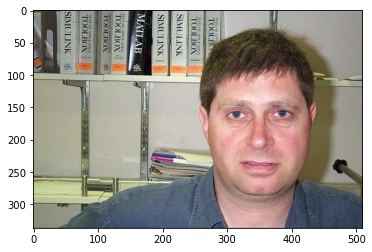

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline      
plt.imshow(mpimg.imread(filenames[0]))

In [ ]:
for i in range(5):
    print(distances[0][i])

4.2146848e-08
0.6032694
0.6071576
0.6297979
0.63568777


In [ ]:
import random

In [ ]:
def similar_images(paths):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in range(len(paths)):
        if plotnumber<=len(paths) :
            ax = plt.subplot(2,5,plotnumber)
            plt.imshow(mpimg.imread(paths[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

In [ ]:
def org_image(querry):
    plt.imshow(mpimg.imread(querry), interpolation='lanczos')
    plt.xlabel(querry.split('.')[0] + '_Original Image',fontsize=20)
    plt.show()

In [ ]:
lenimg = len(filenames)

******Original Image***********


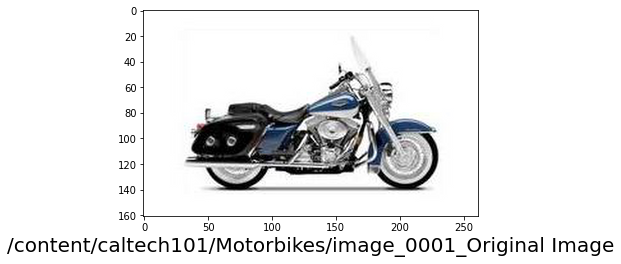

********* Predictions ***********


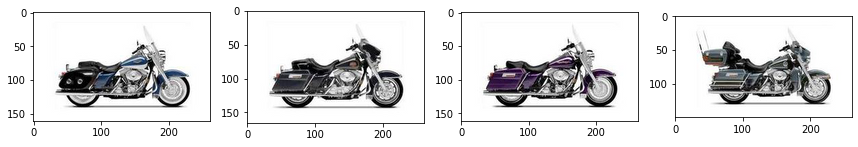

******Original Image***********


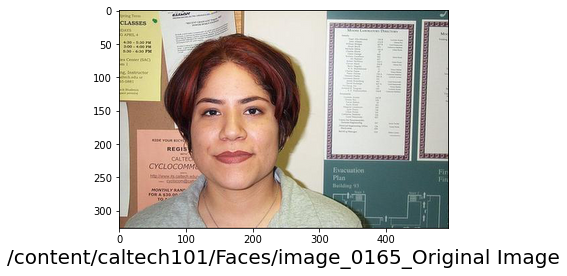

********* Predictions ***********


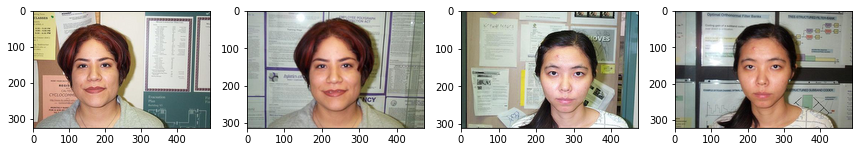

******Original Image***********


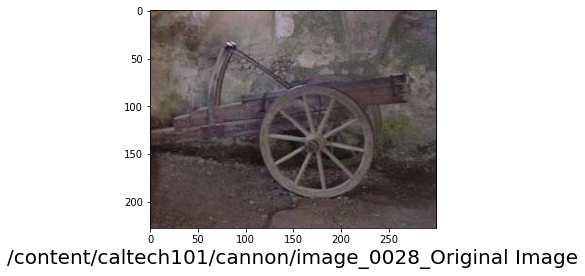

********* Predictions ***********


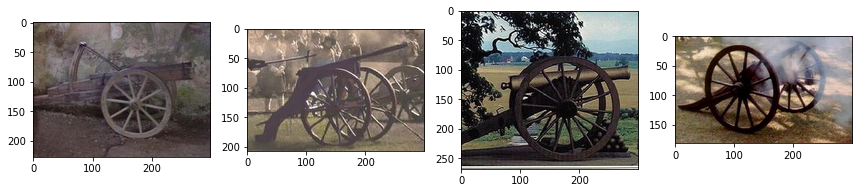

******Original Image***********


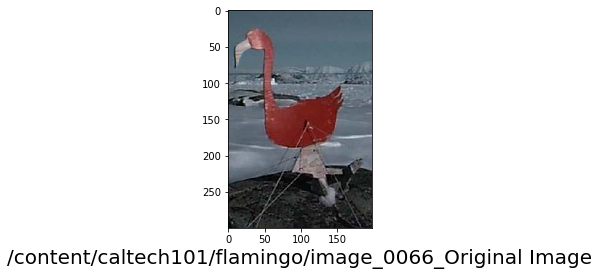

********* Predictions ***********


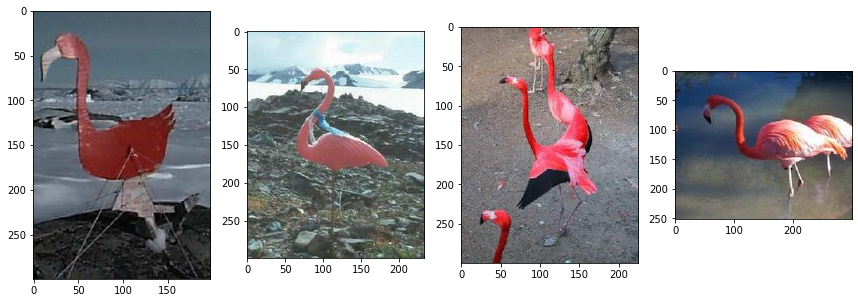

******Original Image***********


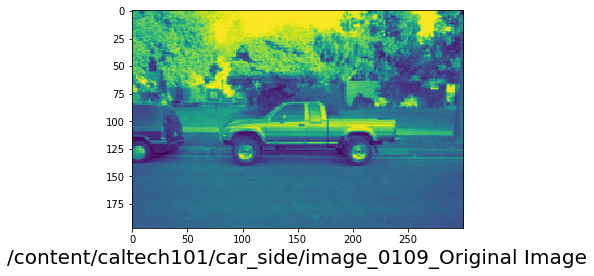

********* Predictions ***********


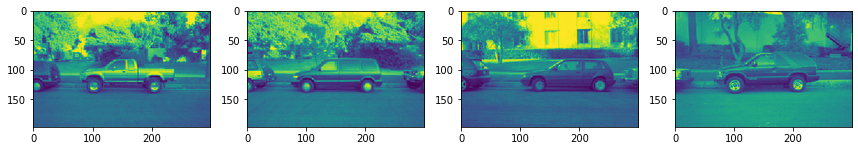

******Original Image***********


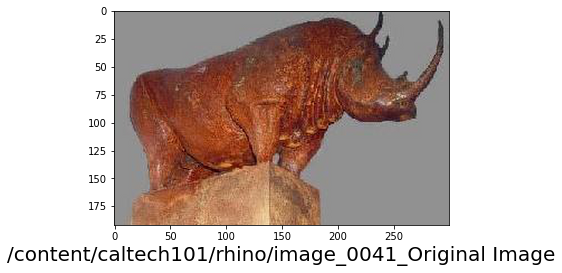

********* Predictions ***********


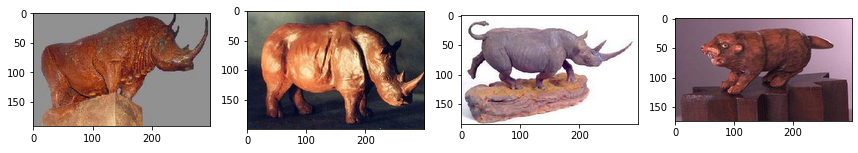

In [ ]:
for i in range(6):
    random_image_index = random.randint(0,lenimg)
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
    # don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] +[filenames[indices[0][i]] for i in range(1,4)]
    print("******Original Image***********")
    org_image(filenames[random_image_index])
    print('********* Predictions ***********')
    similar_images(similar_image_paths)
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib

In [ ]:
num_feature_dimensions=100
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

In [ ]:
print(pca.explained_variance_ratio_[0:20])

[0.0611019  0.04382469 0.04060571 0.0322854  0.02124297 0.01967339
 0.01750923 0.01519272 0.01506693 0.01313027 0.01261716 0.01226298
 0.01129625 0.01055882 0.00959002 0.0093974  0.00869047 0.00849483
 0.00836701 0.00772746]


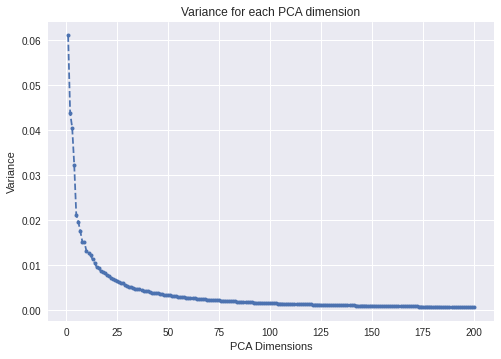

In [ ]:
pca = PCA(200)
pca.fit(feature_list)
matplotlib.style.use('seaborn')
plt.plot(range(1,201),pca.explained_variance_ratio_,'o--', markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

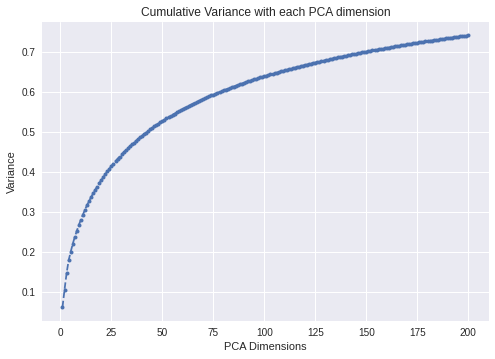

In [ ]:
plt.plot(range(1,201),pca.explained_variance_ratio_.cumsum(),'o--', markersize=4)
plt.title ('Cumulative Variance with each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...
[t-SNE] Computed neighbors for 4000 samples in 0.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.143684
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.889908
[t-SNE] KL divergence after 1000 iterations: 1.096759


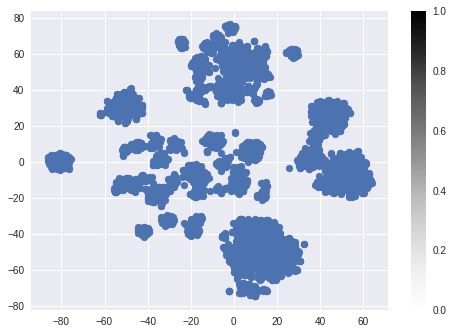

In [ ]:
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:4000]
# selected_class_ids = class_ids[:4000]
selected_filenames = filenames[:4000]

tsne_results =TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()
